In [77]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

r = requests.get("https://api.dawum.de/")
data = json.loads(r.text)
#print(data)

In [78]:
def num_of_parties():
    return len(data["Parties"])
    
def party_name_by_id(id):
    parties = data["Parties"]
    return parties[str(id)]["Shortcut"]

def survey_by_id(id):
    surveys = data["Surveys"]
    return surveys[str(id)]

def survey_list():
    out = []
    for s in data["Surveys"]:
        out.append(data["Surveys"][s])
    return out

def parties_in_survey(survey):
    out = []
    for party_id in survey["Results"]:
        out.append(party_id)
    return out

def result_of_party_in_survey(survey, party_id):
    return survey["Results"][str(party_id)]
#print(num_of_parties())
#print(party_name_by_id(5))
#print(survey_by_id(365))
#print(survey_list())

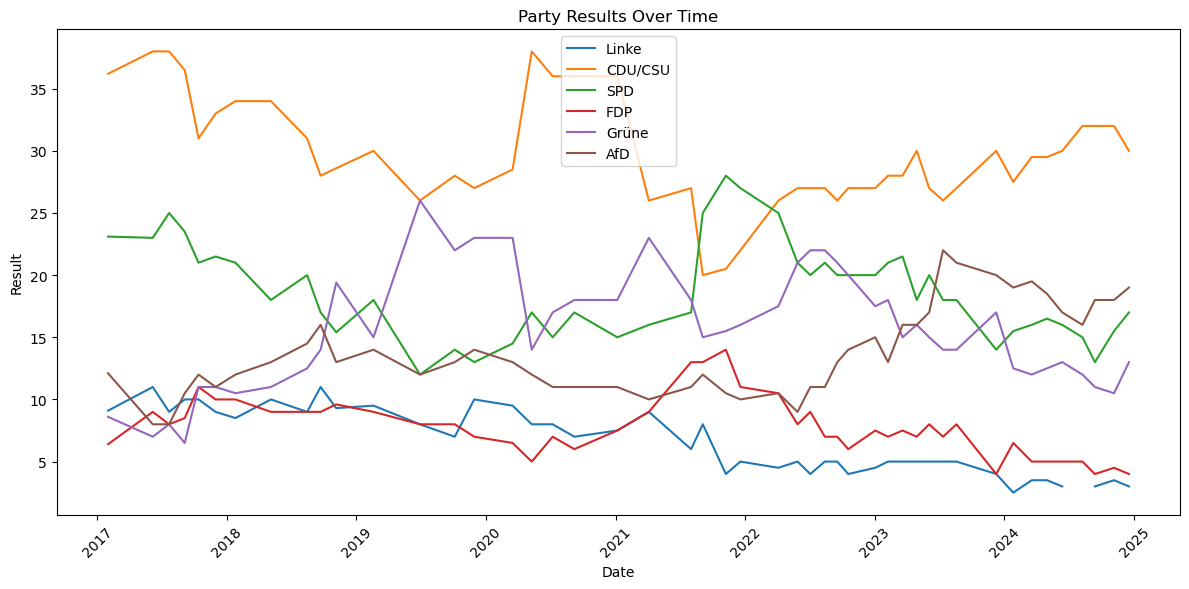

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_party(party_id):
    party_name = party_name_by_id(party_id)
    party_data = ([], [])
    
    for i in range(0, len(survey_list()), 50):
        s = survey_list()[i]
        if s["Parliament_ID"] == "0":
            for p in parties_in_survey(s):
                if p == party_id:
                    party_data[0].append(s["Date"])
                    party_data[1].append(result_of_party_in_survey(s, p))
    
    # Daten umkehren, damit sie chronologisch sortiert sind
    d = party_data[0]
    r = party_data[1]
    d.reverse()
    r.reverse()
    
    # DataFrame erstellen
    df = pd.DataFrame({'Date': pd.to_datetime(d), 'Result': r})
    df.set_index('Date', inplace=True)
    return df

# Ergebnisse für verschiedene Parteien sammeln
party_ids = ["5", "1", "2", "3", "4", "7"]
dataframes = [plot_party(pid) for pid in party_ids]
import matplotlib.pyplot as plt
import pandas as pd

def plot_party(party_id):
    party_name = party_name_by_id(party_id)
    party_data = ([], [])
    
    for i in range(0, len(survey_list()), 50):
        s = survey_list()[i]
        if s["Parliament_ID"] == "0":
            for p in parties_in_survey(s):
                if p == party_id:
                    party_data[0].append(s["Date"])
                    party_data[1].append(result_of_party_in_survey(s, p))
    
    # Daten umkehren, damit sie chronologisch sortiert sind
    d = party_data[0]
    r = party_data[1]
    d.reverse()
    r.reverse()
    
    # DataFrame erstellen
    df = pd.DataFrame({'Date': pd.to_datetime(d), 'Result': r})
    df.set_index('Date', inplace=True)
    return df

# Ergebnisse für verschiedene Parteien sammeln
party_ids = ["5", "1", "2", "3", "4", "7"]
dataframes = [plot_party(pid) for pid in party_ids]

# Alle Datenframes zusammenführen
all_data = pd.concat(dataframes, axis=1, join='outer')
all_data.columns = party_ids

# Plotten
plt.figure(figsize=(12, 6))
for party_id in party_ids:
    plt.plot(all_data.index, all_data[party_id], linestyle='-', label=f'{party_name_by_id(party_id)}')

plt.legend()
plt.title("Party Results Over Time")
plt.xlabel("Date")
plt.ylabel("Result")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()